## **MLP USECASE :Sentiment Analysis** 
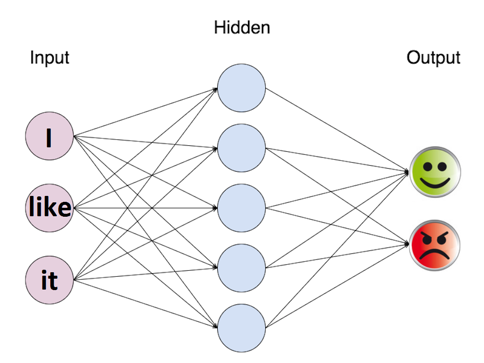

**Data Formatting**

Text Data --> Feature Extraction ---> Word Embeddings --> Deep Learning Models.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import os
# print(os.listdir("../input"))
plt.style.use('ggplot')

## **Data**

Download data from [here](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences). This dataset consist of labelled reviews from Amazon, IMDB and Yelp. Each review is labelled with 0 for a negative sentiment and 1 for a positive sentiment.

In [2]:
#Load data using Pandas
import pandas as pd

filepath_dict = {'yelp':   '/content/drive/MyDrive/NN_DL/LAB6_Text_mlp/sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt',
                 'amazon': '/content/drive/MyDrive/NN_DL/LAB6_Text_mlp/sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt',
                 'imdb':   '/content/drive/MyDrive/NN_DL/LAB6_Text_mlp/sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0:5])

                                            sentence  label source
0                           Wow... Loved this place.      1   yelp
1                                 Crust is not good.      0   yelp
2          Not tasty and the texture was just nasty.      0   yelp
3  Stopped by during the late May bank holiday of...      1   yelp
4  The selection on the menu was great and so wer...      1   yelp


In [3]:
df.head()

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp


In [4]:
df.tail()

,sentence,label,source
743,I just got bored watching Jessice Lange take h...,0,imdb
744,"Unfortunately, any virtue in this film's produ...",0,imdb
745,"In a word, it is embarrassing.",0,imdb
746,Exceptionally bad!,0,imdb
747,All in all its an insult to one's intelligence...,0,imdb


## **Feature Extraction(Bag of Words)**
The text data can not be fed in to a neural network in it's actual form.We need to extrcat features (numerical representation) to represent the information.

*   Count the frequency of each word in each sentence and tie this count back to the entire set of words in the data set. The collection of texts is  called a **corpus** in NLP. The vocabulary in this case is a list of words that occurred in our text where each word has its own index. 
*   Take the sentence to vectorize, and count each occurrence in the vocabulary. The resulting vector will be with the length of the vocabulary and a count for each word in the vocabulary. The resulting vector is also called a **feature vector**. 

**Example:**

(1) John likes ice cream.

(2) John hates chocolate.

Vocabulary: Set all the unique words in the sentences.

"John","chocolate","cream","hates","ice","likes".

This vocabulary can then be used to create a feature vector of the count of the words:

**{'John': 0, 'chocolate': 1, 'cream': 2, 'hates': 3, 'ice': 4, 'likes': 5**}

* This vocabulary serves also as an index of each word. take each sentence and get the word occurrences of the words based on the previous vocabulary. 
* The vocabulary consists of all five words in the above sentences, each representing one word in the vocabulary. 
* Use **CountVectorizer** to represent the count of each word of the sentence:  

Refer the following to read more about Bag of Words
1. https://en.wikipedia.org/wiki/Bag-of-words_model
2. https://machinelearningmastery.com/gentle-introduction-bag-words-model/
3. https://towardsdatascience.com/a-simple-explanation-of-the-bag-of-words-model-b88fc4f4971

In [5]:
sentences = ['John likes ice cream', 'John hates chocolate.']
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences)
vectorizer.vocabulary_


{'John': 0, 'chocolate': 1, 'cream': 2, 'hates': 3, 'ice': 4, 'likes': 5}

In [6]:
vectorizer.transform(sentences).toarray()

array([[1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 0, 0]])

In [7]:
sentences = ['Mary also likes to watch football games.', 'John likes to watch movies. Mary likes movies too.', 'I love holidays']
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences)
vectorizer.vocabulary_

{'John': 0,
 'Mary': 1,
 'also': 2,
 'football': 3,
 'games': 4,
 'holidays': 5,
 'likes': 6,
 'love': 7,
 'movies': 8,
 'to': 9,
 'too': 10,
 'watch': 11}

In [8]:
vectorizer.transform(sentences).toarray()

array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])

### **Dataset Splitup**

Take the Amazon dataset and and seperate the sentences and labels and do train-test split.

In [67]:
df_amazon= df[df['source'] == 'amazon']
sentences = df_amazon['sentence'].values
y = df_amazon['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

Create the feature vectors for each sentence of the training and testing set using CountVectorizer:

In [68]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
print(y.shape)

(1000,)


In [69]:
print("Train set size: {}".format(X_train.shape))
print("Test set size: {}".format(X_test.shape))


Train set size: (750, 1546)
Test set size: (250, 1546)


### **Label Encoding** 

In [70]:
from tensorflow.keras.utils import to_categorical
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### **Model Building** 

In [71]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.layers import Dense, Activation, BatchNormalization,Dropout

In [72]:
model=Sequential()
model.add(Dense(512,input_shape=(X_train.shape[1],),activation='sigmoid'))
model.add(Dropout(0.2))  
model.add(BatchNormalization())
model.add(Dense(256,activation='sigmoid'))
model.add(Dropout(0.2))  
model.add(BatchNormalization())
model.add(Dense(256,activation='sigmoid'))
model.add(Dropout(0.2))  
model.add(BatchNormalization())
model.add(Dense(256,activation='sigmoid'))
model.add(Dropout(0.2))  
model.add(BatchNormalization())
model.add(Dense(2,activation='softmax'))

In [73]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 512)               792064    
                                                                 
 dropout_32 (Dropout)        (None, 512)               0         
                                                                 
 batch_normalization_33 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_45 (Dense)            (None, 256)               131328    
                                                                 
 dropout_33 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_34 (Bat  (None, 256)              1024      
 chNormalization)                                    

In [74]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [75]:
history=model.fit(X_train,y_train,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_16/dense_44/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_16/dense_44/embedding_lookup_sparse/Reshape:0", shape=(None, 512), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_16/dense_44/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


24/24 [==============================] - 2s 15ms/step - loss: 0.9018 - accuracy: 0.5080
Epoch 2/100
24/24 [==============================] - 0s 14ms/step - loss: 0.8445 - accuracy: 0.5413
Epoch 3/100
24/24 [==============================] - 0s 14ms/step - loss: 0.6942 - accuracy: 0.6493
Epoch 4/100
24/24 [==============================] - 0s 15ms/step - loss: 0.5418 - accuracy: 0.7533
Epoch 5/100
24/24 [==============================] - 0s 14ms/step - loss: 0.4402 - accuracy: 0.8160
Epoch 6/100
24/24 [==============================] - 0s 15ms/step - loss: 0.3437 - accuracy: 0.8600
Epoch 7/100
24/24 [==============================] - 0s 14ms/step - loss: 0.3077 - accuracy: 0.8840
Epoch 8/100
24/24 [==============================] - 0s 14ms/step - loss: 0.2517 - accuracy: 0.9067
Epoch 9/100
24/24 [==============================] - 0s 14ms/step - loss: 0.2133 - accuracy: 0.9187
Epoch 10/100
24/24 [==============================] - 0s 15ms/step - loss: 0.2231 - accuracy: 0.9200
Epoch 11/10

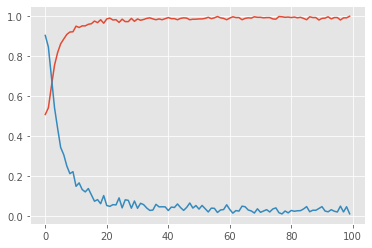

In [77]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.show()

In [78]:
hist=model.evaluate(X_test,y_test)

8/8 [==============================] - 0s 4ms/step - loss: 1.1066 - accuracy: 0.8040


In [79]:
print(hist)

[1.106600046157837, 0.8040000200271606]


**Pack Everything Together** 

In [89]:
def mlp():
  model=Sequential()
  model.add(Dense(512,input_shape=(X_train.shape[1],),activation='sigmoid'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(Dense(256,activation='sigmoid'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(Dense(256,activation='sigmoid'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(Dense(256,activation='sigmoid'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(Dense(2,activation='softmax'))
  opt=tf.keras.optimizers.Adam(learning_rate=0.001)
  model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
  return model


In [90]:
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values

    sentences_train, sentences_test, y_train, y_test = train_test_split(
        sentences, y, test_size=0.25, random_state=1000)

    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    classifier = mlp()
    classifier.fit(X_train, y_train,epochs=100,verbose=0)
    score = classifier.evaluate(X_test, y_test)
    print('Accuracy for {} data: {:.4f}'.format(source, score[1]))
    #print('Loss for {} data: {:.4f}'.format(source, score[0]))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_23/dense_79/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_23/dense_79/embedding_lookup_sparse/Reshape:0", shape=(None, 512), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_23/dense_79/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


8/8 [==============================] - 0s 4ms/step - loss: 1.1049 - accuracy: 0.7840
Accuracy for yelp data: 0.7840


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_24/dense_84/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_24/dense_84/embedding_lookup_sparse/Reshape:0", shape=(None, 512), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_24/dense_84/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


8/8 [==============================] - 0s 3ms/step - loss: 1.2621 - accuracy: 0.7720
Accuracy for amazon data: 0.7720


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_25/dense_89/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_25/dense_89/embedding_lookup_sparse/Reshape:0", shape=(None, 512), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_25/dense_89/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


6/6 [==============================] - 0s 4ms/step - loss: 1.6423 - accuracy: 0.7701
Accuracy for imdb data: 0.7701


In [91]:
print('Accuracy for yelp data: 0.7840')
print('Accuracy for amazon data: 0.7720')
print('Accuracy for imdb data: 0.7701')

Accuracy for yelp data: 0.7840
Accuracy for amazon data: 0.7720
Accuracy for imdb data: 0.7701


**Experiment to do**

* Download the [Spam](https://drive.google.com/file/d/1uzHs52d6Pt9av12D_gSB0HuybniJtAmD/view?usp=sharing) dataset.
*  Read about different [word embedding](https://towardsdatascience.com/word-embedding-techniques-word2vec-and-tf-idf-explained-c5d02e34d08#:~:text=The%20word%20embedding%20techniques%20are,purpose%20of%20processing%20the%20data.) techniques. 
* Use any word embedding technique and Implement a Multi Layer Perceptron classifier to classify the data.